<a href="https://colab.research.google.com/github/JinyongShin/TensorFlow/blob/main/04_Multi_Variable_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.4.0'

## **Hypothesis**
H($x_{1},x_{2},x_{3},...,x_{n}$) = $w_{1} x_{1} + w_{2} x_{2} + w_{3} x_{3} + ... + w_{n} x_{n} + b$

## **Cost function**
cost(W,b) = $\frac{1}{m}$$\sum_{i=1}^{m}$${(H(x_{1},x_{2},x_{3},...,x_{n})-y_{i})}^{2}$

## **Matrix**
Variable 많아져서 일일이 다 써주기 굉장히 불편하다 $\rightarrow$ Matrix 사용!

## **Hypothesis Using Matrix**
$w_{1} x_{1} + w_{2} x_{2} + w_{3} x_{3} + ... + w_{n} x_{n}$

$\begin{pmatrix}
  x_{1} & x_{2} & x_{3} & ...
\end{pmatrix}
\cdot
\begin{pmatrix}
  w_{1} \\
  w_{2} \\
  w_{3} \\
  .\\.\\.
\end{pmatrix}
= (w_{1} x_{1} + w_{2} x_{2} + w_{3} x_{3} + ... + w_{n} x_{n})$

$H(X) = XW$ $\rightarrow$ Matrix 연산을위해 X matrix가 앞쪽에 오게 된다.

Matrix 를 사용하면 variable의 개수가 많아도, x instance (data의 row) 가 많아도 항상 $H(X)=XW$ 로 표현이 가능하다!




## **$WX$ vs $XW$**

# $\bullet$ Lecture (theory)

$H(x) = Wx + b $

$h_{\theta}(x) = {\theta}_{1} x + {\theta}_{0}$

$f(x) = ax + b$

# $\bullet$ Implementation (TensorFlow)

$H(X) = XW$


예제 

$H(x_{1},x_{2},x_{3}) = w_{1}x_{1} + w_{2}x_{2} + w_{3} x_{3} $

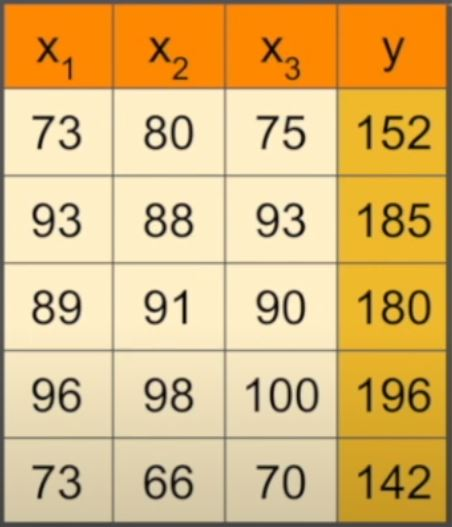


In [2]:
# data and label
x1 = [73. , 93. , 89. , 96. , 73.] 
x2 = [80. , 88. , 91. , 98. , 66.]
x3 = [75. , 93. , 90. , 100. , 70.]
Y = [152. , 185. , 180. , 196. , 142.]

# weights
w1 = tf.Variable(10.)
w2 = tf.Variable(10.)
w3 = tf.Variable(10.)
b = tf.Variable(10.)

learning_rate = 0.000001

for i in range(1000+1):
  # tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
  # calculates the gradients of the cost
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  # update w1,w2,w3 and b
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w1_grad)
  w3.assign_sub(learning_rate * w1_grad)
  b.assign_sub(learning_rate * w1_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 | 5793889.5000
   50 |   64233.2695
  100 |     715.0060
  150 |       9.6198
  200 |       1.6568
  250 |       1.5533
  300 |       1.5505
  350 |       1.5503
  400 |       1.5503
  450 |       1.5503
  500 |       1.5503
  550 |       1.5503
  600 |       1.5503
  650 |       1.5503
  700 |       1.5503
  750 |       1.5503
  800 |       1.5503
  850 |       1.5503
  900 |       1.5503
  950 |       1.5503
 1000 |       1.5503


random 초기화 : tf.random.normal()

In [3]:
# data and label
x1 = [73. , 93. , 89. , 96. , 73.] 
x2 = [80. , 88. , 91. , 98. , 66.]
x3 = [75. , 93. , 90. , 100. , 70.]
Y = [152. , 185. , 180. , 196. , 142.]

# weights
w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

for i in range(1000+1):
  # tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
  # calculates the gradients of the cost function
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  # update w1,w2,w3 and b
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w1_grad)
  w3.assign_sub(learning_rate * w1_grad)
  b.assign_sub(learning_rate * w1_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   21892.1055
   50 |     246.4168
  100 |       8.0429
  150 |       5.5627
  200 |       5.5523
  250 |       5.5540
  300 |       5.5541
  350 |       5.5541
  400 |       5.5541
  450 |       5.5541
  500 |       5.5541
  550 |       5.5541
  600 |       5.5541
  650 |       5.5541
  700 |       5.5541
  750 |       5.5541
  800 |       5.5541
  850 |       5.5541
  900 |       5.5541
  950 |       5.5541
 1000 |       5.5541


Matrix 사용

In [5]:
data = np.array([
                 #x1, x2, x3, y
                 [73., 80., 75., 152.],
                 [93., 88., 93., 185.],
                 [89., 91., 90., 180.],
                 [96., 98., 100., 196.],
                 [73., 66., 70., 142.]
], dtype=np.float32)

# Slice Data
X = data[:,:-1]
y = data[:,[-1]]

W = tf.Variable(tf.random.normal([3,1])) #변수3개 이므로 3by1 행렬
b = tf.Variable(tf.random.normal([1]))

# Hypothesis, prediction function
def predict(X):
  return tf.matmul(X, W) + b 

learning_rate = 0.000001

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
  #tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X)-y)))

  # calculates the gradients of the loss
  W_grad , b_grad = tape.gradient(cost, [W,b])

  #updates parameters (W and b)
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 14182.5488
  100 |    21.6454
  200 |    19.7987
  300 |    19.6958
  400 |    19.5938
  500 |    19.4923
  600 |    19.3914
  700 |    19.2909
  800 |    19.1912
  900 |    19.0918
 1000 |    18.9931
 1100 |    18.8948
 1200 |    18.7971
 1300 |    18.6999
 1400 |    18.6033
 1500 |    18.5071
 1600 |    18.4114
 1700 |    18.3164
 1800 |    18.2217
 1900 |    18.1277
 2000 |    18.0340


Predict

In [11]:
Y #labels, 실제값

[152.0, 185.0, 180.0, 196.0, 142.0]

In [13]:
predict(X).numpy() #prediction, 예측값

array([[156.73872],
       [180.8896 ],
       [182.02887],
       [198.7426 ],
       [135.74088]], dtype=float32)

In [14]:
# 새로운 데이터에 대한 예측

predict([[89.,95.,92.],[84.,92.,85.]]).numpy()

array([[188.53775],
       [179.08957]], dtype=float32)